In [81]:
import pandas as pd
pd.options.mode.chained_assignment = None
from math import*
import numpy as np
import seaborn as sns
%matplotlib inline
import os
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [82]:
df.dtypes

ID                                       int64
Situação de rua                         object
Onde dormiu ontem                       object
Tempo de permanência                    object
Sexo                                    object
Identifica com o sexo nasceu            object
Idade                                   object
Faixa de idade                          object
Classificação de idade                  object
Cor_Raça_Etnia                          object
Parentes no CA                          object
Tempo na situação                       object
Tipo de ponto                           object
Presença_Moradia_Improvisada            object
Criança_acomp_Adulto                    object
Criança_Sozinha                         object
Latitude                               float64
Longitude                              float64
Data                            datetime64[ns]
Subprefeitura                           object
Distrito                                object
dtype: object

In [83]:
df = pd.read_excel('dados.xlsx')
dados = pd.DataFrame(df)

# Como o target ID apenas contabiliza a pessoa, logo não é relevante para a análise.
dados = df.drop('ID', axis=1)
dados

,Situação de rua,Onde dormiu ontem,Tempo de permanência,Sexo,Identifica com o sexo nasceu,Idade,Faixa de idade,Classificação de idade,Cor_Raça_Etnia,Parentes no CA,Tempo na situação,Tipo de ponto,Presença_Moradia_Improvisada,Criança_acomp_Adulto,Criança_Sozinha,Latitude,Longitude,Data,Subprefeitura,Distrito
0,Rua,Não se aplica,Não se aplica,Feminino,Não respondeu,Não respondeu,Sem informação,Sem informação,Sem identificação,Não informado,NR/NS,Praça,Não,Não,Não,-23.496278,-46.391831,2021-10-25,Itaim Paulista,Itaim Paulista
1,Acolhido,Rua,Não se aplica,Masculino,Homem Cisgênero,38,31 a 49,Adulto,Parda,Sim,Mais de 10 anos,Não se aplica,Não se aplica,Não se aplica,Não se aplica,-23.522517,-46.522712,2021-10-25,Penha,Penha
2,Rua,Não se aplica,Não se aplica,Feminino,Mulher Cisgênero,27,18 a 30,Juventude,Parda,Sim,Mais de 2 anos até 5 anos,Praça,Sim,Não,Não,-23.523293,-46.654984,2021-11-03,Sé,Santa Cecília
3,Rua,Não se aplica,Não se aplica,Masculino,Homem Cisgênero,15,12 a 17,Adolescente,Branca,Sim,Mais de 5 anos até 10 anos,Calçada,Sim,Não,Não,-23.743078,-46.692948,2021-10-27,Capela do Socorro,Grajaú
4,Rua,Não se aplica,Não se aplica,Feminino,Mulher Cisgênero,Não respondeu,Sem informação,Sem informação,Sem identificação,Sim,NR/NS,Canteiro central,Sim,Não,Não,-23.525142,-46.625523,2021-11-09,Mooca,Pari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31879,Acolhido,Neste centro de acolhida (aqui),Entre 1 mês e 3 meses,Masculino,Homem Cisgênero,53,50 a 59,Adulto,Parda,Sim,Mais de 5 anos até 10 anos,Não se aplica,Não se aplica,Não se aplica,Não se aplica,-23.573725,-46.505001,2021-11-09,Aricanduva-Formosa-Carrão,Aricanduva
31880,Rua,Não se aplica,Não se aplica,Masculino,Homem Cisgênero,60,60 a 69,Idoso,Preta,Sim,Entre 1 semana e 1 mês,Outro,Não,Não,Não,-23.506855,-46.571922,2021-10-21,Vila Maria-Vila Guilherme,Vila Maria
31881,Rua,Não se aplica,Não se aplica,Masculino,Homem Cisgênero,38,31 a 49,Adulto,Parda,Sim,Mais de 1 ano até 2 anos,Área externa de imóvel (recuo de garagem),Não,Não,Não,-23.671142,-46.768861,2021-11-10,Campo Limpo,Capão Redondo
31882,Acolhido,Neste centro de acolhida (aqui),Entre 3 meses e 6 meses,Masculino,Homem Cisgênero,35,31 a 49,Adulto,Parda,Sim,Mais de 2 anos até 5 anos,Não se aplica,Não se aplica,Não se aplica,Não se aplica,-23.754310,-46.683435,2021-10-26,Capela do Socorro,Grajaú


In [84]:
dados['Onde dormiu ontem'] = dados['Onde dormiu ontem'].apply(lambda x: 'CA' if x == 'Neste centro de acolhida (aqui)' else x)
dados

,Situação de rua,Onde dormiu ontem,Tempo de permanência,Sexo,Identifica com o sexo nasceu,Idade,Faixa de idade,Classificação de idade,Cor_Raça_Etnia,Parentes no CA,Tempo na situação,Tipo de ponto,Presença_Moradia_Improvisada,Criança_acomp_Adulto,Criança_Sozinha,Latitude,Longitude,Data,Subprefeitura,Distrito
0,Rua,Não se aplica,Não se aplica,Feminino,Não respondeu,Não respondeu,Sem informação,Sem informação,Sem identificação,Não informado,NR/NS,Praça,Não,Não,Não,-23.496278,-46.391831,2021-10-25,Itaim Paulista,Itaim Paulista
1,Acolhido,Rua,Não se aplica,Masculino,Homem Cisgênero,38,31 a 49,Adulto,Parda,Sim,Mais de 10 anos,Não se aplica,Não se aplica,Não se aplica,Não se aplica,-23.522517,-46.522712,2021-10-25,Penha,Penha
2,Rua,Não se aplica,Não se aplica,Feminino,Mulher Cisgênero,27,18 a 30,Juventude,Parda,Sim,Mais de 2 anos até 5 anos,Praça,Sim,Não,Não,-23.523293,-46.654984,2021-11-03,Sé,Santa Cecília
3,Rua,Não se aplica,Não se aplica,Masculino,Homem Cisgênero,15,12 a 17,Adolescente,Branca,Sim,Mais de 5 anos até 10 anos,Calçada,Sim,Não,Não,-23.743078,-46.692948,2021-10-27,Capela do Socorro,Grajaú
4,Rua,Não se aplica,Não se aplica,Feminino,Mulher Cisgênero,Não respondeu,Sem informação,Sem informação,Sem identificação,Sim,NR/NS,Canteiro central,Sim,Não,Não,-23.525142,-46.625523,2021-11-09,Mooca,Pari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31879,Acolhido,CA,Entre 1 mês e 3 meses,Masculino,Homem Cisgênero,53,50 a 59,Adulto,Parda,Sim,Mais de 5 anos até 10 anos,Não se aplica,Não se aplica,Não se aplica,Não se aplica,-23.573725,-46.505001,2021-11-09,Aricanduva-Formosa-Carrão,Aricanduva
31880,Rua,Não se aplica,Não se aplica,Masculino,Homem Cisgênero,60,60 a 69,Idoso,Preta,Sim,Entre 1 semana e 1 mês,Outro,Não,Não,Não,-23.506855,-46.571922,2021-10-21,Vila Maria-Vila Guilherme,Vila Maria
31881,Rua,Não se aplica,Não se aplica,Masculino,Homem Cisgênero,38,31 a 49,Adulto,Parda,Sim,Mais de 1 ano até 2 anos,Área externa de imóvel (recuo de garagem),Não,Não,Não,-23.671142,-46.768861,2021-11-10,Campo Limpo,Capão Redondo
31882,Acolhido,CA,Entre 3 meses e 6 meses,Masculino,Homem Cisgênero,35,31 a 49,Adulto,Parda,Sim,Mais de 2 anos até 5 anos,Não se aplica,Não se aplica,Não se aplica,Não se aplica,-23.754310,-46.683435,2021-10-26,Capela do Socorro,Grajaú


In [85]:
ordem_faixa = ['Até 11', '12 a 17', '18 a 30', '31 a 49', '50 a 59', '60 a 69', '70 a 79', '80 a 89', '90 a 99', 'Sem informação']
ordem_classificacao = ['Criança', 'Adolescente', 'Juventude', 'Adulto', 'Idoso', 'Sem classificação']

In [95]:
dados['Faixa de idade'] = pd.Categorical(dados['Faixa de idade'], categories=ordem_faixa, ordered=True)

In [96]:
dados['Classificação de idade'] = pd.Categorical(dados['Classificação de idade'], categories=ordem_classificacao, ordered=True)

# Fazendo a análise exploratória com as faixas de idade.

In [97]:
dados['Faixa de idade'].value_counts()

31 a 49           10901
Sem informação     9805
18 a 30            4086
50 a 59            3744
60 a 69            2104
70 a 79             460
Até 11              375
12 a 17             301
80 a 89              98
90 a 99              10
Name: Faixa de idade, dtype: int64

### 1) Cruzando dados referentes a situação de rua e as faixas de idade.

In [98]:
pd.crosstab(dados['Situação de rua'], dados['Faixa de idade'], normalize=True)*100

Faixa de idade,Até 11,12 a 17,18 a 30,31 a 49,50 a 59,60 a 69,70 a 79,80 a 89,90 a 99,Sem informação
Situação de rua,,,,,,,,,,
Acolhido,1.082047,0.323046,4.870782,15.076527,6.141011,4.538326,1.041275,0.247773,0.031364,6.401330
Rua,0.094091,0.621001,7.944424,19.113035,5.601556,2.060595,0.401455,0.059591,0.000000,24.350772


In [99]:
pd.crosstab(dados['Situação de rua'], dados['Faixa de idade'])

Faixa de idade,Até 11,12 a 17,18 a 30,31 a 49,50 a 59,60 a 69,70 a 79,80 a 89,90 a 99,Sem informação
Situação de rua,,,,,,,,,,
Acolhido,345,103,1553,4807,1958,1447,332,79,10,2041
Rua,30,198,2533,6094,1786,657,128,19,0,7764


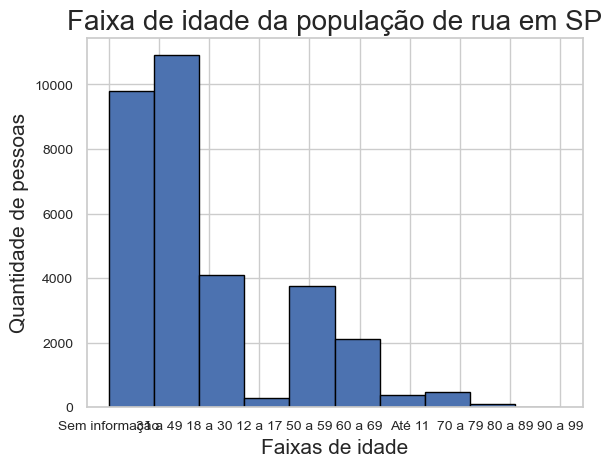

In [120]:
plt.hist(dados['Faixa de idade'], bins=10, edgecolor='black')

plt.xlabel('Faixas de idade', fontsize=15)
plt.ylabel('Quantidade de pessoas', fontsize=15)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.title('Faixa de idade da população de rua em SP', fontsize=20)
plt.show()

In [92]:
dados['Classificação de idade'].value_counts()

Adulto               14645
Juventude             4086
Idoso                 2672
Criança                375
Adolescente            301
Sem classificação        0
Name: Classificação de idade, dtype: int64

In [93]:
pd.crosstab(dados['Situação de rua'], dados['Classificação de idade'], normalize=True) * 100

Classificação de idade,Criança,Adolescente,Juventude,Adulto,Idoso
Situação de rua,,,,,
Acolhido,1.562571,0.466507,7.033833,30.639975,8.460528
Rua,0.135876,0.896780,11.472440,35.690022,3.641469


In [94]:
pd.crosstab(dados['Situação de rua'], dados['Classificação de idade'])

Classificação de idade,Criança,Adolescente,Juventude,Adulto,Idoso
Situação de rua,,,,,
Acolhido,345,103,1553,6765,1868
Rua,30,198,2533,7880,804
